In [1]:
import pandas as pd
import numpy as np
import statistics as stat
import matplotlib.pyplot as plt
import math
from scipy.optimize import curve_fit
from scipy.special import gamma, factorial

In [2]:
coincidence = pd.read_csv("coincidence.txt", sep=" ")
n = 6.

In [3]:
coincidence

,N,t1,t2,CH1_C1,CH1_C2,CH1_C3,CH1_C4,CH1_C5,CH1_C6,CH2_C1,...,CH2_C3,CH2_C4,CH2_C5,CH2_C6,AND_C1,AND_C2,AND_C3,AND_C4,AND_C5,AND_C6
0,1,34.4,34.4,6184,6159,6251,6013,6059,6143,14535,...,14513,14412,14377,14286,409,409,433,404,442,450
1,2,36.4,34.4,6416,6402,6631,6566,6719,6680,14286,...,14320,14184,14296,14613,416,413,432,380,450,406
2,3,38.4,34.4,6670,6649,6726,6743,6675,6654,14394,...,14392,14365,14180,14530,382,407,367,402,405,441
3,4,40.4,34.4,7047,7684,7648,7750,7689,7760,14311,...,14436,14307,14428,14236,415,385,439,400,433,371
4,5,42.4,34.4,7827,7814,7909,7603,7903,7859,14743,...,14403,14584,14442,14486,495,430,420,397,393,406
5,6,44.4,34.4,8616,8291,8474,8709,8309,8534,14353,...,14659,14560,14457,14542,382,405,356,396,361,385
6,7,46.4,34.4,8301,8405,8358,8517,8679,8464,14263,...,14405,14567,14270,14418,73,74,76,72,72,67
7,8,48.4,34.4,8664,8564,8650,8581,8727,8553,14178,...,14438,14420,14593,14437,13,17,13,8,11,11
8,9,50.4,34.4,8557,8532,8494,8580,8453,8586,14182,...,14144,14368,14491,14505,5,3,6,5,8,6
9,10,52.4,34.4,8485,8570,8645,8744,8698,8667,14651,...,14409,14661,14376,14481,2,4,3,4,6,2


In [4]:
coincidence['CH1_mean'] = (coincidence['CH1_C1']+coincidence['CH1_C2']+coincidence['CH1_C3']+coincidence['CH1_C4']+coincidence['CH1_C5']+coincidence['CH1_C6'])/n

In [5]:
coincidence['CH2_mean'] = (coincidence['CH2_C1']+coincidence['CH2_C2']+coincidence['CH2_C3']+coincidence['CH2_C4']+coincidence['CH2_C5']+coincidence['CH2_C6'])/n

In [6]:
coincidence['AND_mean'] = (coincidence['AND_C1']+coincidence['AND_C2']+coincidence['AND_C3']+coincidence['AND_C4']+coincidence['AND_C5']+coincidence['AND_C6'])/n

In [7]:
coincidence['CH1_error'] = (coincidence['CH1_mean'])**0.5/n

In [8]:
coincidence['CH2_error'] = (coincidence['CH2_mean'])**0.5/n

In [9]:
coincidence['AND_error'] = (coincidence['AND_mean'])**0.5/n

In [10]:
coincidence

,N,t1,t2,CH1_C1,CH1_C2,CH1_C3,CH1_C4,CH1_C5,CH1_C6,CH2_C1,...,AND_C3,AND_C4,AND_C5,AND_C6,CH1_mean,CH2_mean,AND_mean,CH1_error,CH2_error,AND_error
0,1,34.4,34.4,6184,6159,6251,6013,6059,6143,14535,...,433,404,442,450,6134.833333,14398.833333,424.500000,13.054196,19.999190,3.433900
1,2,36.4,34.4,6416,6402,6631,6566,6719,6680,14286,...,432,380,450,406,6569.000000,14367.500000,416.166667,13.508228,19.977418,3.400027
2,3,38.4,34.4,6670,6649,6726,6743,6675,6654,14394,...,367,402,405,441,6686.166667,14343.500000,400.666667,13.628164,19.960725,3.336110
3,4,40.4,34.4,7047,7684,7648,7750,7689,7760,14311,...,439,400,433,371,7596.333333,14348.500000,407.166667,14.526158,19.964204,3.363062
4,5,42.4,34.4,7827,7814,7909,7603,7903,7859,14743,...,420,397,393,406,7819.166667,14483.000000,423.500000,14.737675,20.057556,3.429853
5,6,44.4,34.4,8616,8291,8474,8709,8309,8534,14353,...,356,396,361,385,8488.833333,14498.500000,380.833333,15.355811,20.068286,3.252492
6,7,46.4,34.4,8301,8405,8358,8517,8679,8464,14263,...,76,72,72,67,8454.000000,14361.333333,72.333333,15.324273,19.973130,1.417483
7,8,48.4,34.4,8664,8564,8650,8581,8727,8553,14178,...,13,8,11,11,8623.166667,14395.166667,12.166667,15.476835,19.996643,0.581346
8,9,50.4,34.4,8557,8532,8494,8580,8453,8586,14182,...,6,5,8,6,8533.666667,14361.000000,5.500000,15.396308,19.972898,0.390868
9,10,52.4,34.4,8485,8570,8645,8744,8698,8667,14651,...,3,4,6,2,8634.833333,14481.833333,3.500000,15.487301,20.056748,0.311805


Text(0, 0.5, 'Counts (Hz)')

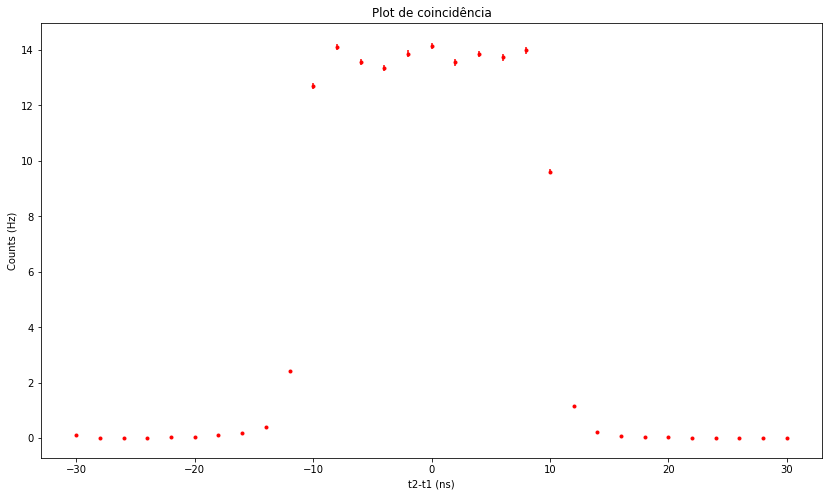

In [11]:
fig2, ax2 = plt.subplots(figsize=(14,8))
ax2.errorbar(x=coincidence['t2']-coincidence['t1'], y=coincidence['AND_mean']/30, yerr=coincidence['AND_error']/30, fmt='.', color='r');
ax2.set_title("Plot de coincidência")
#ax2.set_yscale('log')
ax2.set_xlabel('t2-t1 (ns)')
ax2.set_ylabel('Counts (Hz)')

Text(0, 0.5, 'Counts (Hz)')

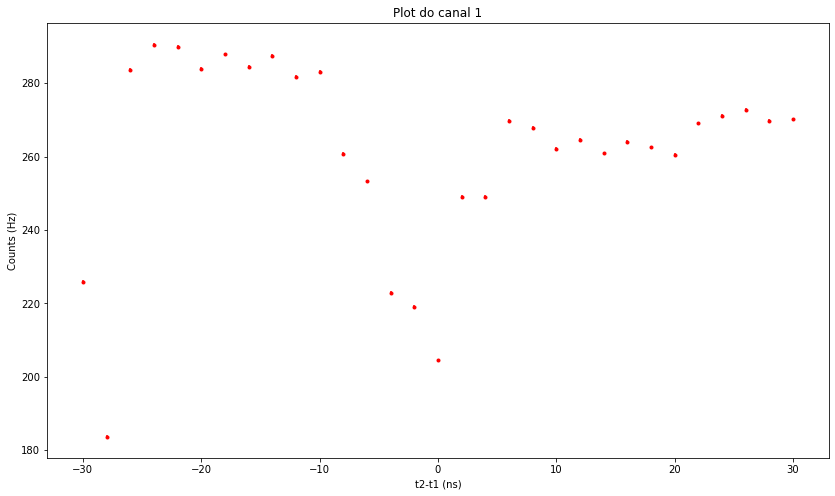

In [12]:
fig2, ax2 = plt.subplots(figsize=(14,8))
ax2.errorbar(x=coincidence['t2']-coincidence['t1'], y=coincidence['CH1_mean']/30, yerr=coincidence['CH1_error']/30, fmt='.', color='r');
ax2.set_title("Plot do canal 1")
#ax2.set_yscale('log')
ax2.set_xlabel('t2-t1 (ns)')
ax2.set_ylabel('Counts (Hz)')

Text(0, 0.5, 'Counts (Hz)')

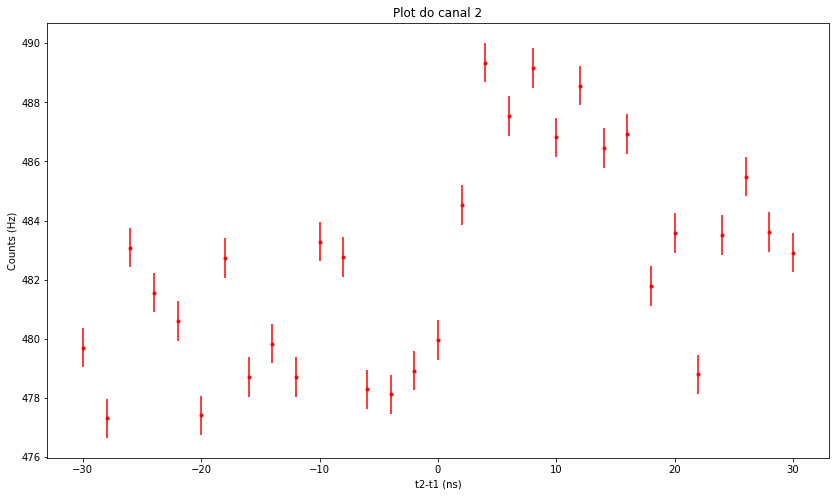

In [13]:
fig2, ax2 = plt.subplots(figsize=(14,8))
ax2.errorbar(x=coincidence['t2']-coincidence['t1'], y=coincidence['CH2_mean']/30, yerr=coincidence['CH2_error']/30, fmt='.', color='r');
ax2.set_title("Plot do canal 2")
#ax2.set_yscale('log')
ax2.set_xlabel('t2-t1 (ns)')
ax2.set_ylabel('Counts (Hz)')

In [14]:
def func(x, a, w, k):
    #a=14
    return a * np.exp(-np.abs(x/w)**k)

In [15]:
popt, pcov = curve_fit(func, 
                       coincidence['t2']-coincidence['t1'], 
                       coincidence['AND_mean']/30., 
                       maxfev=100000, 
                       p0 = [14.,5.,5.])

In [16]:
a, w, k = popt 
print(*popt)

13.826036076242577 11.329502181475029 12.537176282264424


In [17]:
a_error, w_error, k_error = np.diag(pcov)**0.5
print(*pcov)

[ 0.02810065 -0.00362676 -0.05966434] [-0.00362676  0.00561876  0.01041277] [-0.05966434  0.01041277  1.01544573]


In [18]:
print(a, "+/-", a_error)

13.826036076242577 +/- 0.16763248118731766


In [19]:
print(w, "+/-", w_error)

11.329502181475029 +/- 0.07495840274743286


In [20]:
print(k, "+/-", k_error)

12.537176282264424 +/- 1.0076932710682236


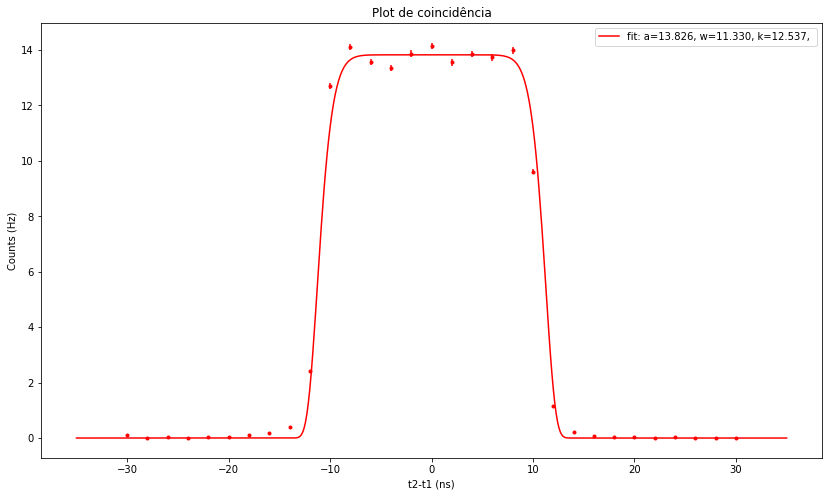

In [21]:
fig2, ax2 = plt.subplots(figsize=(14,8))
ax2.errorbar(x=coincidence['t2']-coincidence['t1'], y=coincidence['AND_mean']/30, yerr=coincidence['AND_error']/30, fmt='.', color='r');
ax2.set_title("Plot de coincidência")
#ax2.set_yscale('log')
ax2.set_xlabel('t2-t1 (ns)')
ax2.set_ylabel('Counts (Hz)')
x = np.linspace(-35, 35, 500)
ax2.plot(x, func(x, *popt), 'r',
         label='fit: a=%5.3f, w=%5.3f, k=%5.3f, ' % tuple(popt))
plt.legend()

In [22]:
FWHM = 2* math.log(2)**(1/k)*w
FWHM_error = math.sqrt( (2* (1/k) * math.log(2)**(1/k-1)*w)**2*k_error**2 + (2* math.log(2)**(1/k))**2*w_error**2)
print(FWHM, "+/-", FWHM_error, "ns")

22.00617791111638 +/- 2.5559570474599784 ns


In [24]:
R = 2*coincidence['CH1_mean']*coincidence['CH2_mean']*20.*10e-9/(30.*30.*30.)
R_error = np.sqrt((2*coincidence['CH2_mean']*20.*10e-9/(30.*30.*30.))**2*coincidence['CH1_error']**2 + (2*coincidence['CH1_mean']*20.*10e-9/(30.*30.*30.))**2*coincidence['CH2_error']**2)

In [25]:
R.mean()

0.0016824456349395992

In [26]:
R_error.mean()

3.928927107989925e-06

In [33]:
# Following Leo:
R = coincidence['CH1_mean']*coincidence['CH2_mean']*FWHM*10e-9/(30.*30.)
R_error = np.sqrt((coincidence['CH2_mean']*FWHM*10e-9/(30.*30.))**2*coincidence['CH1_error']**2 + (coincidence['CH1_mean']*FWHM*10e-9/(30.*30.))**2*coincidence['CH2_error']**2+ (coincidence['CH1_mean']*coincidence['CH2_mean']/(30.*30.))**2*(FWHM_error*10e-9)**2)

In [34]:
R.mean()

0.02776814847619649

In [35]:
R_error.mean()

0.003225846640532827